In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Asteroid_Updated.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,10,15,16,23,24) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df

,name,a,e,i,om,w,q,ad,per_y,data_arc,...,UB,IR,spec_B,spec_T,G,moid,class,n,per,ma
0,Ceres,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,...,0.426,NaN,C,G,0.12,1.594780,MBA,0.213885,1683.145708,77.372096
1,Pallas,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,...,0.284,NaN,B,B,0.11,1.233240,MBA,0.213503,1686.155999,59.699133
2,Juno,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,...,0.433,NaN,Sk,S,0.32,1.034540,MBA,0.226019,1592.787285,34.925016
3,Vesta,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,...,0.492,NaN,V,V,0.32,1.139480,MBA,0.271609,1325.432765,95.861936
4,Astraea,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,...,0.411,NaN,S,S,NaN,1.095890,MBA,0.238632,1508.600458,282.366289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839709,NaN,2.812945,0.664688,4.695700,183.310012,234.618352,0.943214,4.682676,4.717914,17298.0,...,NaN,NaN,NaN,NaN,NaN,0.032397,APO,0.208911,1723.217927,156.905910
839710,NaN,2.645238,0.259376,12.574937,1.620020,339.568072,1.959126,3.331350,4.302346,16.0,...,NaN,NaN,NaN,NaN,NaN,0.956145,MBA,0.229090,1571.431965,13.366251
839711,NaN,2.373137,0.202053,0.732484,176.499082,198.026527,1.893638,2.852636,3.655884,5.0,...,NaN,NaN,NaN,NaN,NaN,0.893896,MBA,0.269600,1335.311579,355.351127
839712,NaN,2.260404,0.258348,9.661947,204.512448,148.496988,1.676433,2.844376,3.398501,10.0,...,NaN,NaN,NaN,NaN,NaN,0.680220,MBA,0.290018,1241.302609,15.320134


In [5]:
df.isna().sum()

name              817747
a                      2
e                      0
i                      0
om                     0
w                      0
q                      0
ad                     6
per_y                  1
data_arc           15474
condition_code       867
n_obs_used             0
H                   2689
neo                    6
pha                16442
diameter          702078
extent            839696
albedo            703305
rot_per           820918
GM                839700
BV                838693
UB                838735
IR                839713
spec_B            838048
spec_T            838734
G                 839595
moid               16442
class                  0
n                      2
per                    6
ma                     8
dtype: int64

## Since we have to predict Diameter,
### For model formation :- droping the values with unknown diameter
### For Prediction :- the values with unknown diameter
#### On observing data diameter and albedo both are missing hence we have to drop albedo also.



In [6]:
df=df.dropna(subset=["diameter"])

In [7]:
df=df.dropna(subset=["albedo"])

In [8]:
df.isna().sum()

name              121302
a                      0
e                      0
i                      0
om                     0
w                      0
q                      0
ad                     0
per_y                  0
data_arc             129
condition_code         0
n_obs_used             0
H                    273
neo                    0
pha                    0
diameter               0
extent            136394
albedo                 0
rot_per           125252
GM                136394
BV                135408
UB                135448
IR                136405
spec_B            135048
spec_T            135448
G                 136289
moid                   0
class                  0
n                      0
per                    0
ma                     0
dtype: int64

In [9]:
len(df)

136406

In [10]:
df.columns

Index(['name', 'a', 'e', 'i', 'om', 'w', 'q', 'ad', 'per_y', 'data_arc',
       'condition_code', 'n_obs_used', 'H', 'neo', 'pha', 'diameter', 'extent',
       'albedo', 'rot_per', 'GM', 'BV', 'UB', 'IR', 'spec_B', 'spec_T', 'G',
       'moid', 'class', 'n', 'per', 'ma'],
      dtype='object')

#### Since columns-'extent',  'rot_per', 'GM', 'BV', 'UB', 'IR', 'spec_B', 'spec_T', 'G' has more than 100k missing values hence droping them

In [11]:
df=df.drop(['extent','rot_per', 'GM', 'BV', 'UB', 'IR', 'spec_B', 'spec_T', 'G'],axis=1)

In [12]:
df.isna().sum()

name              121302
a                      0
e                      0
i                      0
om                     0
w                      0
q                      0
ad                     0
per_y                  0
data_arc             129
condition_code         0
n_obs_used             0
H                    273
neo                    0
pha                    0
diameter               0
albedo                 0
moid                   0
class                  0
n                      0
per                    0
ma                     0
dtype: int64

In [13]:
len(df)

136406

### 130k is large hence droping values with NAN in "data_arc","H"

In [14]:
df=df.dropna(subset=["data_arc","H"])

In [15]:
df.head()

,name,a,e,i,om,w,q,ad,per_y,data_arc,...,H,neo,pha,diameter,albedo,moid,class,n,per,ma
0,Ceres,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,...,3.34,N,N,939.4,0.0900,1.59478,MBA,0.213885,1683.145708,77.372096
1,Pallas,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,...,4.13,N,N,545,0.1010,1.23324,MBA,0.213503,1686.155999,59.699133
2,Juno,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,...,5.33,N,N,246.596,0.2140,1.03454,MBA,0.226019,1592.787285,34.925016
3,Vesta,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,...,3.20,N,N,525.4,0.4228,1.13948,MBA,0.271609,1325.432765,95.861936
4,Astraea,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,...,6.85,N,N,106.699,0.2740,1.09589,MBA,0.238632,1508.600458,282.366289


In [16]:
df.describe()

,a,e,i,om,w,q,ad,per_y,data_arc,n_obs_used,H,albedo,moid,n,per,ma
count,136005.000000,136005.000000,136005.000000,136005.000000,136005.000000,136005.000000,136005.000000,136005.000000,136005.000000,136005.000000,136005.000000,136005.000000,136005.000000,136005.000000,1.360050e+05,136005.000000
mean,2.815693,0.145313,10.282281,169.807486,181.836278,2.403970,3.227416,4.888298,9038.231322,682.142436,15.168089,0.130239,1.421260,0.219453,1.785451e+03,183.059375
std,1.530973,0.077182,6.787443,102.719643,103.549080,0.516701,2.912808,25.684872,6152.748606,595.352159,1.404894,0.110096,0.512976,0.056268,9.381399e+03,103.311876
min,0.626226,0.000489,0.021855,0.000738,0.004466,0.081882,0.999956,0.495569,1.000000,5.000000,3.200000,0.001000,0.000166,0.000128,1.810067e+02,0.000517
25%,2.537771,0.089642,5.086016,82.280385,91.854209,2.069771,2.865559,4.042843,6317.000000,222.000000,14.400000,0.053000,1.083150,0.181237,1.476648e+03,94.382492
50%,2.751052,0.138445,9.333112,160.495337,183.544850,2.364667,3.167517,4.563063,7593.000000,505.000000,15.300000,0.079000,1.385500,0.216001,1.666659e+03,186.758091
75%,3.092468,0.190912,13.660185,256.133089,271.650499,2.686388,3.467761,5.438335,9774.000000,992.000000,16.100000,0.189000,1.699980,0.243795,1.986352e+03,271.324734
max,389.145964,0.984348,170.323647,359.990858,359.995174,40.465671,772.201080,7676.742943,72684.000000,9325.000000,27.500000,1.000000,39.507000,1.988877,2.803930e+06,359.999979


In [17]:
df.dtypes

name               object
a                 float64
e                 float64
i                 float64
om                float64
w                 float64
q                 float64
ad                float64
per_y             float64
data_arc          float64
condition_code     object
n_obs_used          int64
H                 float64
neo                object
pha                object
diameter           object
albedo            float64
moid              float64
class              object
n                 float64
per               float64
ma                float64
dtype: object

### Droping "name"

In [18]:
df=df.drop("name",axis=1)

In [19]:
df.nunique()

a                 136005
e                 136005
i                 136005
om                136005
w                 136005
q                 136005
ad                136005
per_y             136005
data_arc           18546
condition_code        20
n_obs_used          3129
H                    715
neo                    2
pha                    2
diameter           24443
albedo              1057
moid               94012
class                 11
n                 136005
per               136005
ma                136005
dtype: int64

In [20]:
df.pha.unique()

array(['N', 'Y'], dtype=object)

In [21]:
df["pha"]=df["pha"].replace({"N":0,"Y":1})

In [22]:
df.neo.unique()

array(['N', 'Y'], dtype=object)

In [23]:
df["neo"]=df["neo"].replace({"N":0,"Y":1})

In [24]:
df["class"].unique()

array(['MBA', 'OMB', 'MCA', 'AMO', 'IMB', 'TJN', 'CEN', 'APO', 'ATE',
       'AST', 'TNO'], dtype=object)

In [25]:
df["condition_code"].unique()

array([0, 1, 3, 2, '0', '1', '2', '4', '5', '9', '3', '7', 5.0, 6.0, 4.0,
       7.0, 9.0, 8.0, '8', '6'], dtype=object)

In [26]:
df["condition_code"]=df["condition_code"].astype(int)

In [27]:
df.dtypes

a                 float64
e                 float64
i                 float64
om                float64
w                 float64
q                 float64
ad                float64
per_y             float64
data_arc          float64
condition_code      int64
n_obs_used          int64
H                 float64
neo                 int64
pha                 int64
diameter           object
albedo            float64
moid              float64
class              object
n                 float64
per               float64
ma                float64
dtype: object

#### Here diameter is in Object type , changing it to float64

In [28]:
df["diameter"]=df["diameter"].astype(float)

In [29]:
df['class'].value_counts()

MBA    124971
OMB      7394
TJN      1873
IMB       564
APO       454
MCA       336
AMO       255
ATE        91
CEN        48
TNO        13
AST         6
Name: class, dtype: int64

#### here for class, mapping it with numerical value inversely to its density i.e lessor for MBA 

In [30]:
df["class"]=df["class"].replace({'MBA':1, 'OMB':65, 'MCA':10, 'AMO':75, 'IMB':70, 'TJN':20, 'CEN':80, 'APO':85, 'ATE':90,
       'AST':95, 'TNO':100})

In [31]:
df.dtypes

a                 float64
e                 float64
i                 float64
om                float64
w                 float64
q                 float64
ad                float64
per_y             float64
data_arc          float64
condition_code      int64
n_obs_used          int64
H                 float64
neo                 int64
pha                 int64
diameter          float64
albedo            float64
moid              float64
class               int64
n                 float64
per               float64
ma                float64
dtype: object

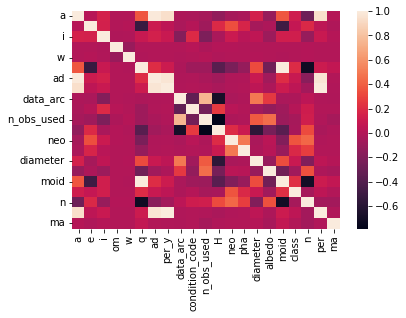

In [32]:
sns.heatmap(df.corr())

#### Box plots for q,data_arc,n_obs_used,H,moid,n

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


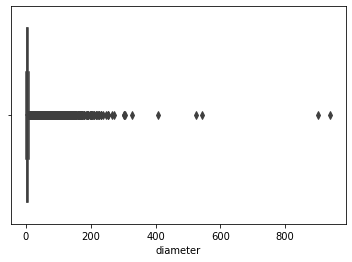

In [33]:
sns.boxplot(df["diameter"]);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


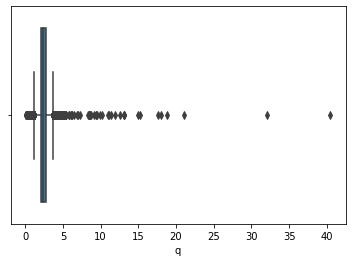

In [34]:
sns.boxplot(df["q"]);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


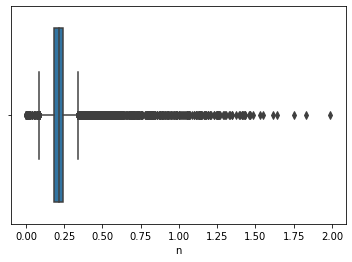

In [35]:
sns.boxplot(df["n"]);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


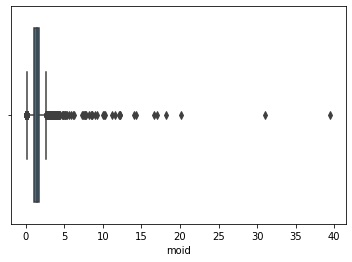

In [36]:
sns.boxplot(df["moid"]);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


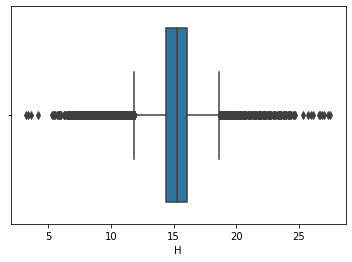

In [37]:
sns.boxplot(df["H"]);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


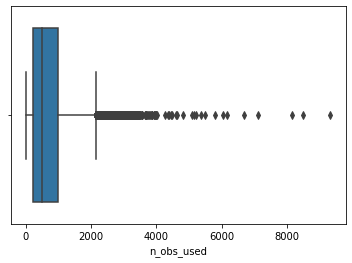

In [38]:
sns.boxplot(df["n_obs_used"]);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


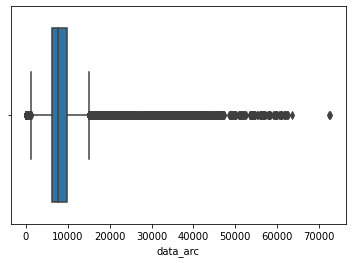

In [39]:
sns.boxplot(df["data_arc"]);

#### Removing outliers

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
u_l=df["moid"].quantile(0.98)
l_l=df["moid"].quantile(0.001)

In [42]:
u_l,l_l

(2.228143599999999, 0.022738374399999997)

In [43]:
df["moid"]=np.where(df["moid"]>u_l,u_l,df["moid"])
df["moid"]=np.where(df["moid"]<l_l,l_l,df["moid"])

In [44]:
u_l=df["diameter"].quantile(0.98)
l_l=df["diameter"].quantile(0.001)

In [45]:
u_l,l_l

(19.831679999999935, 0.251004)

In [46]:
df["diameter"]=np.where(df["diameter"]>u_l,u_l,df["diameter"])
df["diameter"]=np.where(df["diameter"]<l_l,l_l,df["diameter"])

In [47]:
u_l=df["q"].quantile(0.99)
l_l=df["q"].quantile(0.001)

In [48]:
u_l,l_l

(4.725828926713085, 0.5634329087003002)

In [49]:
df["q"]=np.where(df["q"]>u_l,u_l,df["q"])
df["q"]=np.where(df["q"]<l_l,l_l,df["q"])

In [50]:
df.corr()["diameter"].sort_values()

H                -0.795367
n                -0.415110
albedo           -0.222304
condition_code   -0.155115
e                -0.118750
neo              -0.082307
pha              -0.044200
om                0.000551
w                 0.002207
ma                0.023978
per_y             0.047626
per               0.047626
i                 0.099684
ad                0.111940
class             0.168614
a                 0.187234
moid              0.433449
q                 0.495942
n_obs_used        0.535958
data_arc          0.545872
diameter          1.000000
Name: diameter, dtype: float64

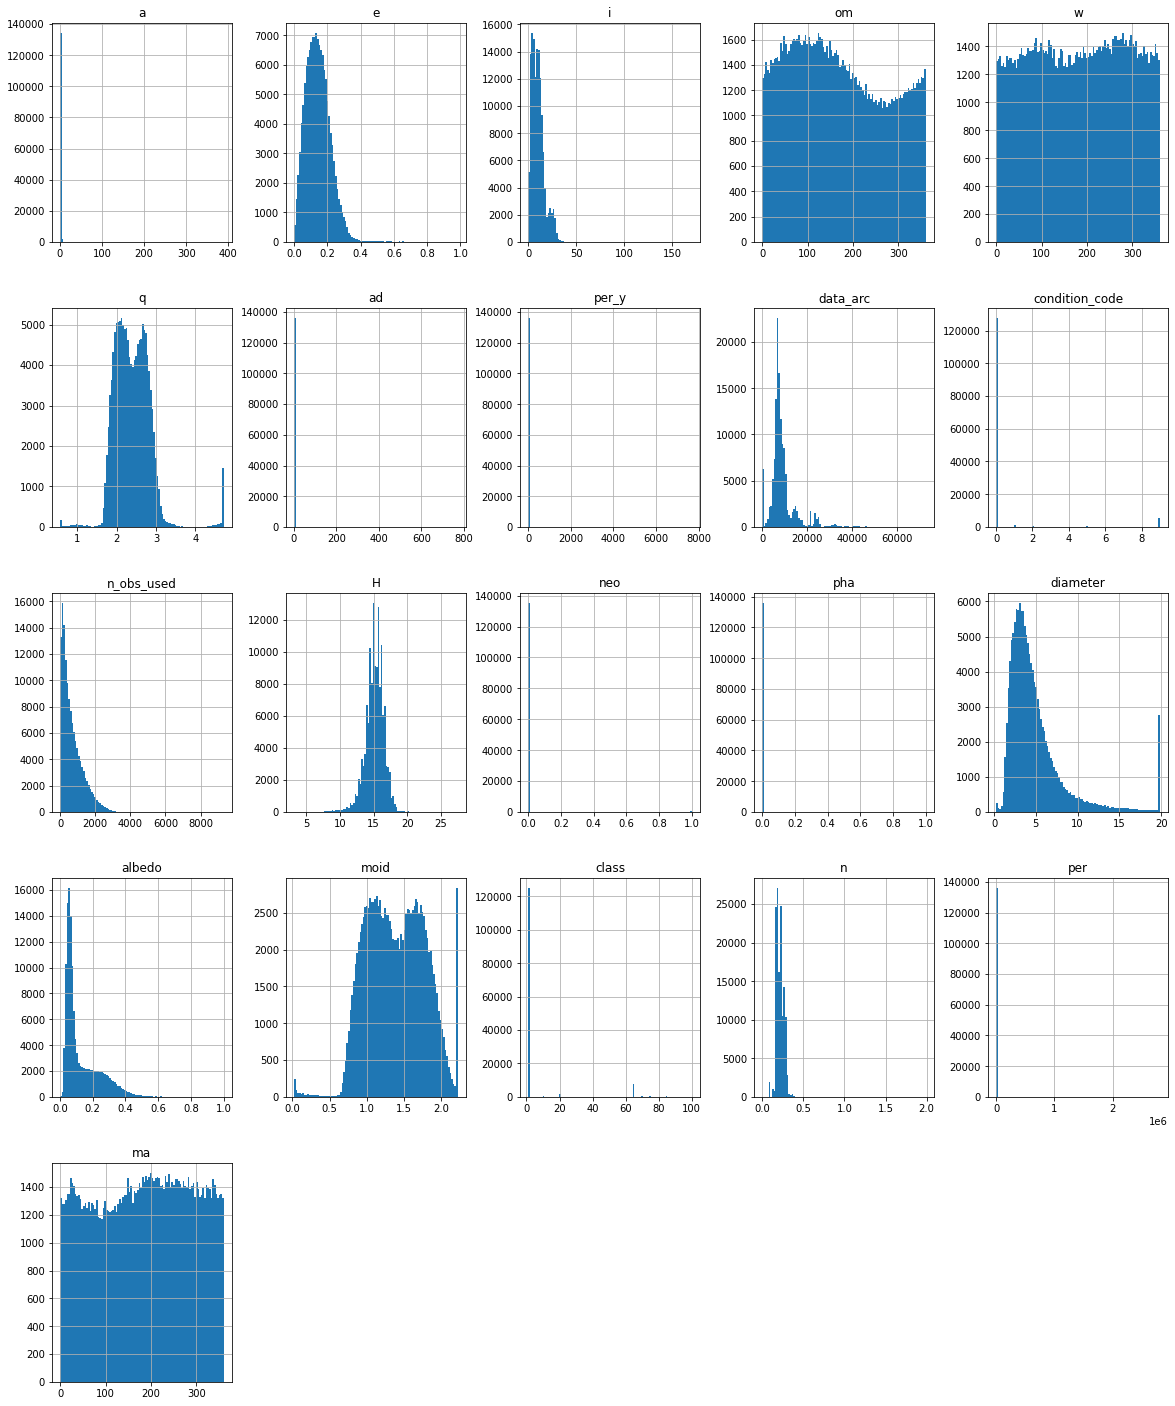

In [51]:
df.hist(bins=100,figsize=(20,25));

In [52]:
df.corr()["diameter"].sort_values()

H                -0.795367
n                -0.415110
albedo           -0.222304
condition_code   -0.155115
e                -0.118750
neo              -0.082307
pha              -0.044200
om                0.000551
w                 0.002207
ma                0.023978
per_y             0.047626
per               0.047626
i                 0.099684
ad                0.111940
class             0.168614
a                 0.187234
moid              0.433449
q                 0.495942
n_obs_used        0.535958
data_arc          0.545872
diameter          1.000000
Name: diameter, dtype: float64

In [53]:
X=df.drop("diameter",axis=1)
y=df["diameter"]

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [56]:
X_train.head()

,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,neo,pha,albedo,moid,class,n,per,ma
381982,2.785245,0.225207,16.360497,183.260350,305.884061,2.157987,3.412502,4.648397,5670.0,0,101,16.7,0,0,0.038,1.212200,1,0.212036,1697.826979,14.983753
132461,2.298186,0.152040,24.476917,78.921171,178.605644,1.948769,2.647603,3.484063,6714.0,0,576,15.6,0,0,0.317,0.933365,1,0.282896,1272.554089,264.231489
10491,3.028178,0.067649,10.654972,148.490266,267.845081,2.823324,3.233032,5.269632,12117.0,0,1797,12.7,0,0,0.171,1.860150,1,0.187039,1924.733124,349.061203
53926,2.626315,0.035522,5.587046,26.275684,157.028194,2.533021,2.719608,4.256262,12882.0,0,581,15.4,0,0,0.025,1.534820,1,0.231571,1554.599578,185.416341
630105,3.215244,0.285095,12.749539,294.736047,206.155911,2.298595,4.131892,5.765394,1.0,9,8,16.7,0,0,0.083,1.318820,65,0.170956,2105.810325,21.294491


In [57]:
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score

In [58]:
from time import time
import catboost as cb
import lightgbm
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [59]:
regressors = [
    KNeighborsRegressor(),
    GradientBoostingRegressor(),
    ExtraTreesRegressor(),
    LGBMRegressor(boosting_type='gbdt', num_leaves=100, max_depth=-1, learning_rate=0.015, n_estimators=1000),
    RandomForestRegressor(),
    DecisionTreeRegressor(),
    LinearRegression(),
    Lasso(),
    Ridge(),
    cb.CatBoostRegressor()
]

In [60]:
 for model in regressors[:10]:
    start = time()
    model.fit(X_train, y_train)
    train_time = time() - start
    start = time()
    y_pred = model.predict(X_test)
    predict_time = time()-start    
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tExplained variance:", explained_variance_score(y_test, y_pred))
    print("\tMean absolute error:", mean_absolute_error(y_test, y_pred))
    print("\tR2 score:", r2_score(y_test, y_pred))
    print()

KNeighborsRegressor()
	Training time: 0.013s
	Prediction time: 63.988s
	Explained variance: 0.7888491143344855
	Mean absolute error: 1.097689220219844
	R2 score: 0.7887040059710665

GradientBoostingRegressor()
	Training time: 72.859s
	Prediction time: 0.052s
	Explained variance: 0.9772857050777193
	Mean absolute error: 0.34454226708255514
	R2 score: 0.9772855131604841

ExtraTreesRegressor()
	Training time: 60.987s
	Prediction time: 1.600s
	Explained variance: 0.9798229208773187
	Mean absolute error: 0.3135065748112198
	R2 score: 0.979821181722346

LGBMRegressor(learning_rate=0.015, n_estimators=1000, num_leaves=100)
	Training time: 20.724s
	Prediction time: 2.027s
	Explained variance: 0.9811074679712718
	Mean absolute error: 0.30341498050247806
	R2 score: 0.9811065731659552

RandomForestRegressor()
	Training time: 197.409s
	Prediction time: 1.468s
	Explained variance: 0.9793574653510762
	Mean absolute error: 0.3151939110870927
	R2 score: 0.9793547160884422

DecisionTreeRegressor()
	Tra

On GridSearch score is almost same
### Now using MLP (multilayer perceptron)

In [61]:
from sklearn.neural_network import MLPRegressor

In [62]:
model6=MLPRegressor(max_iter=1000,warm_start=True,
    activation='tanh')
model6.fit(X_train,y_train)

MLPRegressor(activation='tanh', max_iter=1000, warm_start=True)

In [63]:
model6.score(X_test,y_test)

0.2862602395808044

## Without Albedo 

In [64]:
df2=df.drop("albedo",axis=1)

In [65]:
X2=df2.drop("diameter",axis=1)
y2=df2["diameter"]

In [66]:
X2_train,X2_test,y2_train,y2_test=train_test_split(X2,y2,test_size=0.2)

In [67]:
for model in regressors[:10]:
    start = time()
    model.fit(X2_train, y2_train)
    train_time = time() - start
    start = time()
    y2_pred = model.predict(X2_test)
    predict_time = time()-start    
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tExplained variance:", explained_variance_score(y2_test, y2_pred))
    print("\tMean absolute error:", mean_absolute_error(y2_test, y2_pred))
    print("\tR2 score:", r2_score(y2_test, y2_pred))
    print()

KNeighborsRegressor()
	Training time: 0.014s
	Prediction time: 73.225s
	Explained variance: 0.7885423254203797
	Mean absolute error: 1.0894216478511813
	R2 score: 0.7884809615473449

GradientBoostingRegressor()
	Training time: 71.294s
	Prediction time: 0.052s
	Explained variance: 0.8636561905138851
	Mean absolute error: 0.909963447058609
	R2 score: 0.8636452656040935

ExtraTreesRegressor()
	Training time: 58.395s
	Prediction time: 1.668s
	Explained variance: 0.8802488922090781
	Mean absolute error: 0.807584994603139
	R2 score: 0.8801905320985646

LGBMRegressor(learning_rate=0.015, n_estimators=1000, num_leaves=100)
	Training time: 22.879s
	Prediction time: 1.999s
	Explained variance: 0.8871446807138677
	Mean absolute error: 0.7908835592521889
	R2 score: 0.8871371767181158

RandomForestRegressor()
	Training time: 204.104s
	Prediction time: 1.578s
	Explained variance: 0.8806032085500247
	Mean absolute error: 0.8015279788640125
	R2 score: 0.880559344219132

DecisionTreeRegressor()
	Traini

###Neural Networ using Tensor Flow

In [68]:
df.min()

a                   0.626226
e                   0.000489
i                   0.021855
om                  0.000738
w                   0.004466
q                   0.563433
ad                  0.999956
per_y               0.495569
data_arc            1.000000
condition_code      0.000000
n_obs_used          5.000000
H                   3.200000
neo                 0.000000
pha                 0.000000
diameter            0.251004
albedo              0.001000
moid                0.022738
class               1.000000
n                   0.000128
per               181.006674
ma                  0.000517
dtype: float64

In [69]:
df.columns

Index(['a', 'e', 'i', 'om', 'w', 'q', 'ad', 'per_y', 'data_arc',
       'condition_code', 'n_obs_used', 'H', 'neo', 'pha', 'diameter', 'albedo',
       'moid', 'class', 'n', 'per', 'ma'],
      dtype='object')

In [70]:
df["new_H"]=1/df["H"]
df["new_n"]=1/df["n"]
df["new_albedo"]=1/df["albedo"]
df["newq"]=1/df["q"]
df["new_per"]=1/df["per"]

In [71]:
X=df.drop("diameter",axis=1)
y=df["diameter"]

In [72]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [73]:
df.shape

(136005, 26)

In [74]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


In [78]:
model1 = Sequential([
	Dense(27, input_shape=(25,), kernel_initializer='normal', activation='relu'),
	Dense(54, kernel_initializer='normal', activation='relu'),
	Dense(14, kernel_initializer='normal', activation='relu'),
	Dense(1, kernel_initializer='normal')
   ])

In [79]:
model1.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae'])

In [80]:
history = model1.fit(X_train, y_train, epochs=1000,batch_size=10000,validation_split=0.2)

Epoch 1/1000
9/9 [==============================] - 2s 58ms/step - loss: 26.3848 - mse: 26.3848 - mae: 3.1161 - val_loss: 11.1167 - val_mse: 11.1167 - val_mae: 2.3564
Epoch 2/1000
9/9 [==============================] - 0s 26ms/step - loss: 10.6072 - mse: 10.6072 - mae: 2.2075 - val_loss: 9.5927 - val_mse: 9.5927 - val_mae: 2.1170
Epoch 3/1000
9/9 [==============================] - 0s 39ms/step - loss: 10.1261 - mse: 10.1261 - mae: 2.0876 - val_loss: 8.3161 - val_mse: 8.3161 - val_mae: 2.0130
Epoch 4/1000
9/9 [==============================] - 0s 44ms/step - loss: 8.9738 - mse: 8.9738 - mae: 1.9546 - val_loss: 7.8626 - val_mse: 7.8626 - val_mae: 1.9422
Epoch 5/1000
9/9 [==============================] - 0s 50ms/step - loss: 7.6138 - mse: 7.6138 - mae: 1.9479 - val_loss: 7.6170 - val_mse: 7.6170 - val_mae: 1.9075
Epoch 6/1000
9/9 [==============================] - 0s 45ms/step - loss: 7.4408 - mse: 7.4408 - mae: 1.9089 - val_loss: 7.1011 - val_mse: 7.1011 - val_mae: 1.8710
Epoch 7/1000
9

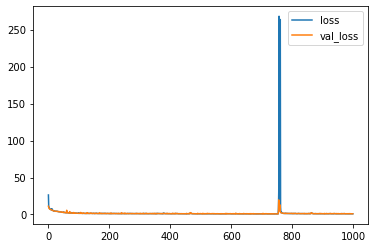

In [81]:
 history_df = pd.DataFrame(history.history)
plt.plot(history_df['loss'], label='loss')
plt.plot(history_df['val_loss'], label='val_loss')
plt.legend()

In [82]:
y_pred=model1.predict(X_test)
y_pred

851/851 [==============================] - 2s 2ms/step


array([[8.753181 ],
       [9.278246 ],
       [2.1332698],
       ...,
       [4.5634933],
       [2.8973553],
       [5.1025796]], dtype=float32)

In [83]:
r2_score(y_test,y_pred)

0.9252503729377657

#### Using custom neural network 94.93 - 92% % is max score with aprrox 0.7 mse

1.   List item
2.   List item



> Indented block



##Without albedo column apllying neural network

In [84]:
df2["new_H"]=1/df2["H"]
df2["new_n"]=1/df2["n"]
df2["new_moid"]=1/df2["moid"]
df2["new_class"]=1/df2["class"]

In [85]:
df2.shape

(136005, 24)

In [86]:
X2=df2.drop("diameter",axis=1)
y2=df2["diameter"]


In [87]:
X2_train,X2_test,y2_train,y2_test=train_test_split(X2,y2,test_size=0.2)

In [88]:
model = Sequential([
	Dense(27, input_shape=(23,), kernel_initializer='normal', activation='relu'),
	Dense(54, kernel_initializer='normal', activation='relu'),
	Dense(14, kernel_initializer='normal', activation='relu'),
	Dense(1, kernel_initializer='normal')
   ])

In [89]:
model.compile(loss='mse', optimizer='Adam', metrics=['mse', 'mae'])

In [90]:
history = model.fit(X2_train, y2_train, epochs=1000,batch_size=10000,validation_split=0.2)

Epoch 1/1000
9/9 [==============================] - 2s 107ms/step - loss: 13.0824 - mse: 13.0824 - mae: 2.3831 - val_loss: 59.8418 - val_mse: 59.8418 - val_mae: 2.1048
Epoch 2/1000
9/9 [==============================] - 0s 47ms/step - loss: 9.4895 - mse: 9.4895 - mae: 2.0026 - val_loss: 44.0891 - val_mse: 44.0891 - val_mae: 2.0547
Epoch 3/1000
9/9 [==============================] - 0s 33ms/step - loss: 8.5018 - mse: 8.5018 - mae: 1.9658 - val_loss: 25.2678 - val_mse: 25.2678 - val_mae: 1.9564
Epoch 4/1000
9/9 [==============================] - 0s 24ms/step - loss: 7.7850 - mse: 7.7850 - mae: 1.9321 - val_loss: 15.5359 - val_mse: 15.5359 - val_mae: 1.8996
Epoch 5/1000
9/9 [==============================] - 0s 27ms/step - loss: 7.2328 - mse: 7.2328 - mae: 1.8882 - val_loss: 14.1976 - val_mse: 14.1976 - val_mae: 1.8778
Epoch 6/1000
9/9 [==============================] - 0s 24ms/step - loss: 6.8053 - mse: 6.8053 - mae: 1.8641 - val_loss: 8.5222 - val_mse: 8.5222 - val_mae: 1.8560
Epoch 7/1

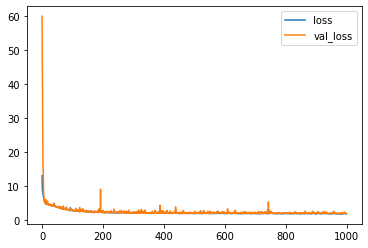

In [91]:
history_df = pd.DataFrame(history.history)
plt.plot(history_df['loss'], label='loss')
plt.plot(history_df['val_loss'], label='val_loss')

plt.legend()

In [92]:
y2_pred=model.predict(X2_test)
y2_pred

851/851 [==============================] - 1s 2ms/step


array([[4.2230906],
       [3.1472278],
       [6.7149754],
       ...,
       [1.9035012],
       [8.993813 ],
       [4.403134 ]], dtype=float32)

In [93]:
y2_test

4278      7.644
159475    2.463
226082    7.977
270786    5.181
130270    5.097
          ...  
62806     4.776
59565     2.501
89403     1.299
6010      7.363
289266    3.328
Name: diameter, Length: 27201, dtype: float64

In [94]:
r2_score(y2_test,y2_pred)

0.8394483367793576